# Cosas por agregar
- visualización
- filtrado
- incluir en loc y iloc ejemplos temporales y booleanos (ej dfl.loc['20130102':'20130104'])

# Links de interés
- Datasets https://www.kaggle.com/datasets
- Documentación de Pandas https://pandas.pydata.org/docs/index.html 
- Cookbook de pandas https://pandas.pydata.org/docs/user_guide/cookbook.html
- Estructura y un par de cosas sobre data engineering https://apmonitor.com/pds/index.php/Main/DataPreparation

# Import importantes y cargo pickles de dfs

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import pickle


# Download latest version
kagglehub.dataset_download("isathyam31/adult-income-prediction-classification")


/home/capitanespiral/Documents/GitHub/data_science/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/capitanespiral/.cache/kagglehub/datasets/isathyam31/adult-income-prediction-classification/versions/1'

In [3]:
#Cargo pickles
with open("df.pkl","rb") as file:
    df=pickle.load(file)
    
with open("df_t.pkl","rb") as file:
    df_t=pickle.load(file)

# Gathering data

## Datos en general

La función más usada, lejos es `read_csv` de pandas, donde basta que demos el path del archivo y su nombre, y se leerá si no hay mayor problema. Por default, la primera fila se transforma en las columnas del dataframe, que podemos ver usando `dataframe.columns`

In [3]:
path="/home/capitanespiral/Documents/GitHub/data_science" #Aquí introducir tu path
filename="data.csv"

df=pd.read_csv(f"{path}/{filename}")
#Display entrega mucho mejor resultado que print para los dataframes!
display(df)
print(df.columns)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')


---
Opciones más usadas de `read_csv`:
- **sep o delimiter** &rarr; El separador de la data, usualmente se encuentra solo pero a veces es mejor darlo explícitamente. (en el caso que se confunda el identificador automático)
- **header** &rarr; Número de fila que se toma como nombre de columnas y desde el cual comienza la data, por default, cero (inicio del .csv).
- **skiprows** &rarr; Filas a saltar desde el inicio del archivo (indexeando desde cero, se puede entregar lista o tupla)
- **skipfooter** &rarr; Filas a saltar desde el final del archivo.
- **usecols** &rarr; Subset de columnas a usar (secuencia de números o nombres explícitos).

In [ ]:
#Si la primera fila está mala, cambiamos el header
df1=pd.read_csv("data_bad_first_row.csv") #Salió pésimo
df2=pd.read_csv("data_bad_first_row.csv",header=1) #Mucho mejor

display(df1)
display(df2)

In [ ]:
#Si la segunda está mala
df3=pd.read_csv("data_bad_second_row.csv") #Primer dato pésimo
df4=pd.read_csv("data_bad_second_row.csv",skiprows=[1],header=0) #Nos saltamos la segunda fila y conservamos el header

display(df3)
display(df4)

In [ ]:
#Seleccionemos ciertas columnas no más
df5=pd.read_csv("data_bad_first_row.csv",header=1,usecols=[0,3]) #Puede ser con números, aquí la primera y la cuarta
df6=pd.read_csv("data_bad_first_row.csv",header=1,usecols=range(4)) #Puede ser con iteradores, acá me entrega de la primera A la cuarta
df7=pd.read_csv("data_bad_first_row.csv",header=1,usecols=["age","education","workclass"]) #Puede ser con los nombres explícitos

display(df5)
display(df6)
display(df7)

In [ ]:
del df1,df2,df3,df4,df5,df6,df7

## Series de Tiempo

Para el caso de series de tiempo, hay que saber trabajar con `Timestamps`, `Datetime`, `Timedelta`, etc...

### Funciones generales 

- **pd.to_datetime()** &rarr; Transforma lo que le entregues en un "Datetime", funciona aceptando varios formatos y si le entregas secuencias.
- **pd.date_range()** &rarr; Para crear puntos en el tiempo equiespaceados, con un "start" un "end", posibilidad de "periods" o "freq"
    - **freq** más comunes:"y" (años),"m" (meses),"W" (semana), "B" (business day), "d" (días), "h" (horas), "min" (minutos), "s" (segundos) Ojo que hay *infinitas* opciones! revisar en https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects
- **df.resample().func()** &rarr; Entregando como variable una frecuencia, podemos "resamplear" según la función "func"

Ejemplos de estas funciones:

In [ ]:
##datetime con varios formatos
dt1=pd.to_datetime(["13/1/2018", np.datetime64("2018-01-13"), datetime.datetime(2018, 1, 13)],dayfirst=True)
print("dt1:",dt1,"\n")

In [ ]:
##date_range
#Creando una lista de tiempo cada tres horas
t1="1-1-2000"
t2="2000-3-10"
dt2=pd.date_range(start=t1,end=t2,freq="3h")
print("dt2:",dt2,"\n")

#Lo mismo pero con 15 minutos
t1="1-1-2000"
t2="2000-3-10"
dt3=pd.date_range(start=t1,end=t2,freq="15min")
print("dt3:",dt3,"\n")

#Si tengo periodos y frecuencia
dt4=pd.date_range(start="2018-8-1", periods=5, freq="2d")
print("dt4:",dt4,"\n")

In [ ]:
#Como usar el resampleo
idx = pd.date_range("2018-01-01", periods=10, freq="h") #ojo que 1h = h
ts = pd.Series(range(len(idx)), index=idx)
print("ts",ts,"\n",sep="\n")
#Downsample (también muy usado el sum)
ts_downsampled=ts.resample("2h").mean() #LEJOS el más útil
print("ts_downsampled",ts_downsampled,"\n",sep="\n")
#upsample (también muy usado bfill)
ts_upsampled=ts.resample("30min").ffill() #Sería interesante, acá interpolar
print("ts_upsampled",ts_upsampled,"\n",sep="\n")

In [16]:
del dt1,dt2,dt3,dt4,idx,ts,ts_upsampled,ts_downsampled

Ahora trabajemos con data de verdad:

In [4]:
df_t=pd.read_csv("biomet1.csv",skiprows=[1],header=0) #Tenemos caso de segunda linea sin sentido
df_t["time_t"]=pd.to_datetime(df_t['date']+" "+df_t['time']) #Lo guardamos en una nueva columna
display(df_t)
print("\nLa columna nueva:",df_t["time_t"],sep="\n")

,date,time,DOY,Ta,Pa,RH,Td,Tc,Rn,LWin,...,Ts_3_1_1,SWC_1_1_1,SWC_2_1_1,SWC_3_1_1,SHF_1_1_1,SHF_2_1_1,SHF_3_1_1,LE,H,time_t
0,2014-01-01,00:30:00,1.0208,285.499,100523.0,87.5984,NaN,285.499,NaN,NaN,...,285.912,0.580774,0.677433,0.264485,1.899400,0.491621,0.750120,0.987573,2.10820,2014-01-01 00:30:00
1,2014-01-01,01:00:00,1.0416,285.169,100531.0,88.4022,NaN,285.169,NaN,NaN,...,285.869,0.581969,0.677369,0.264282,1.439690,0.225682,0.559402,0.167466,-4.62751,2014-01-01 01:00:00
2,2014-01-01,01:30:00,1.0624,285.089,100526.0,89.6953,NaN,285.089,NaN,NaN,...,285.818,0.583308,0.677512,0.264079,0.982225,-0.032565,0.359773,-0.209549,-25.06920,2014-01-01 01:30:00
3,2014-01-01,02:00:00,1.0833,285.388,100514.0,87.9180,NaN,285.388,NaN,NaN,...,285.768,0.584545,0.677424,0.263918,0.527264,-0.292637,0.154871,1.012810,-19.36180,2014-01-01 02:00:00
4,2014-01-01,02:30:00,1.1041,285.454,100498.0,84.4577,NaN,285.454,NaN,NaN,...,285.730,0.585552,0.677087,0.264359,0.088923,-0.545190,-0.036778,-1.875870,-2.52581,2014-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68987,2018-02-08,21:00:00,39.8748,284.809,100917.0,87.2794,8.53473,284.809,-111.9970,622.180,...,287.100,0.269830,0.324491,0.168710,1.388390,0.480249,-0.708542,0.028853,-10.19220,2018-02-08 21:00:00
68988,2018-02-08,21:30:00,39.8956,284.447,100944.0,81.5375,6.87156,284.447,-63.4305,669.949,...,287.074,0.270332,0.324650,0.169308,1.220350,0.355083,-1.070870,10.821500,-11.88980,2018-02-08 21:30:00
68989,2018-02-08,22:00:00,39.9165,284.535,100961.0,77.7024,6.43326,284.535,-70.1655,664.107,...,287.047,0.270886,0.324739,0.169821,1.017980,0.206502,-1.642580,28.889900,-46.52960,2018-02-08 22:00:00
68990,2018-02-08,22:30:00,39.9373,283.947,100990.0,81.4990,6.62946,283.947,-95.6326,635.117,...,286.994,0.271494,0.324923,0.170493,0.785127,0.043090,-1.978500,1.498780,-16.58690,2018-02-08 22:30:00



La columna nueva:
0       2014-01-01 00:30:00
1       2014-01-01 01:00:00
2       2014-01-01 01:30:00
3       2014-01-01 02:00:00
4       2014-01-01 02:30:00
                ...        
68987   2018-02-08 21:00:00
68988   2018-02-08 21:30:00
68989   2018-02-08 22:00:00
68990   2018-02-08 22:30:00
68991   2018-02-08 23:00:00
Name: time_t, Length: 68992, dtype: datetime64[ns]


Nos servirá ahora
- **datetime.min() y .max()** &rarr; Evidente
- **datetimeindex.atributos** &rarr; nos permite acceder a muchas funciones de tiempo como "hour","day","minute","second","dayofyear", "strftime", entre otras (si es una serie, no un índice, agregar dt). La totalidad de atributos y métodos en https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html. La totalidad de formatos para "strftime" en https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
#Podemos acceder a propiedades o métodos específicos de un objeto tipo "datetime" usando el "dt"
print("Solo el año:",df_t["time_t"].dt.year,"\n",sep="\n")
print("Cambio el formato:",df_t["time_t"].dt.strftime("%Y  /   %m   /  %d"),"\n",sep="\n")

In [5]:
#Fijamos un nuevo índice
df_t=df_t.set_index("time_t") #Esto "traslada" la columna "time_t" (ya no existe como columna) - Y pasa a ser datetimeindex
df_t=df_t.drop(columns = ["date","time"]) #Boto las columnas que ya no necesito
display(df_t)
print("Y el nuevo índice:")
print(df_t.index)

,DOY,Ta,Pa,RH,Td,Tc,Rn,LWin,LWout,SWin,...,Ts_2_1_1,Ts_3_1_1,SWC_1_1_1,SWC_2_1_1,SWC_3_1_1,SHF_1_1_1,SHF_2_1_1,SHF_3_1_1,LE,H
time_t,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,1.0208,285.499,100523.0,87.5984,NaN,285.499,NaN,NaN,NaN,NaN,...,286.550,285.912,0.580774,0.677433,0.264485,1.899400,0.491621,0.750120,0.987573,2.10820
2014-01-01 01:00:00,1.0416,285.169,100531.0,88.4022,NaN,285.169,NaN,NaN,NaN,NaN,...,286.498,285.869,0.581969,0.677369,0.264282,1.439690,0.225682,0.559402,0.167466,-4.62751
2014-01-01 01:30:00,1.0624,285.089,100526.0,89.6953,NaN,285.089,NaN,NaN,NaN,NaN,...,286.431,285.818,0.583308,0.677512,0.264079,0.982225,-0.032565,0.359773,-0.209549,-25.06920
2014-01-01 02:00:00,1.0833,285.388,100514.0,87.9180,NaN,285.388,NaN,NaN,NaN,NaN,...,286.368,285.768,0.584545,0.677424,0.263918,0.527264,-0.292637,0.154871,1.012810,-19.36180
2014-01-01 02:30:00,1.1041,285.454,100498.0,84.4577,NaN,285.454,NaN,NaN,NaN,NaN,...,286.329,285.730,0.585552,0.677087,0.264359,0.088923,-0.545190,-0.036778,-1.875870,-2.52581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-08 21:00:00,39.8748,284.809,100917.0,87.2794,8.53473,284.809,-111.9970,622.180,728.531,-3.83177,...,287.524,287.100,0.269830,0.324491,0.168710,1.388390,0.480249,-0.708542,0.028853,-10.19220
2018-02-08 21:30:00,39.8956,284.447,100944.0,81.5375,6.87156,284.447,-63.4305,669.949,729.680,-2.31385,...,287.505,287.074,0.270332,0.324650,0.169308,1.220350,0.355083,-1.070870,10.821500,-11.88980
2018-02-08 22:00:00,39.9165,284.535,100961.0,77.7024,6.43326,284.535,-70.1655,664.107,730.213,-2.66563,...,287.483,287.047,0.270886,0.324739,0.169821,1.017980,0.206502,-1.642580,28.889900,-46.52960


Y el nuevo índice:
DatetimeIndex(['2014-01-01 00:30:00', '2014-01-01 01:00:00',
               '2014-01-01 01:30:00', '2014-01-01 02:00:00',
               '2014-01-01 02:30:00', '2014-01-01 03:00:00',
               '2014-01-01 03:30:00', '2014-01-01 04:00:00',
               '2014-01-01 04:30:00', '2014-01-01 05:00:00',
               ...
               '2018-02-08 18:30:00', '2018-02-08 19:00:00',
               '2018-02-08 19:30:00', '2018-02-08 20:00:00',
               '2018-02-08 20:30:00', '2018-02-08 21:00:00',
               '2018-02-08 21:30:00', '2018-02-08 22:00:00',
               '2018-02-08 22:30:00', '2018-02-08 23:00:00'],
              dtype='datetime64[ns]', name='time_t', length=68992, freq=None)


In [6]:
#Al fijarlo como índice, ahora podemos accesar simplemente con ".atributo"
display(df_t)
print("Solo el día:",df_t.index.day,"\n",sep="\n")
print("Solo el día juliano:",df_t.index.dayofyear,"\n",sep="\n")

,DOY,Ta,Pa,RH,Td,Tc,Rn,LWin,LWout,SWin,...,Ts_2_1_1,Ts_3_1_1,SWC_1_1_1,SWC_2_1_1,SWC_3_1_1,SHF_1_1_1,SHF_2_1_1,SHF_3_1_1,LE,H
time_t,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:30:00,1.0208,285.499,100523.0,87.5984,NaN,285.499,NaN,NaN,NaN,NaN,...,286.550,285.912,0.580774,0.677433,0.264485,1.899400,0.491621,0.750120,0.987573,2.10820
2014-01-01 01:00:00,1.0416,285.169,100531.0,88.4022,NaN,285.169,NaN,NaN,NaN,NaN,...,286.498,285.869,0.581969,0.677369,0.264282,1.439690,0.225682,0.559402,0.167466,-4.62751
2014-01-01 01:30:00,1.0624,285.089,100526.0,89.6953,NaN,285.089,NaN,NaN,NaN,NaN,...,286.431,285.818,0.583308,0.677512,0.264079,0.982225,-0.032565,0.359773,-0.209549,-25.06920
2014-01-01 02:00:00,1.0833,285.388,100514.0,87.9180,NaN,285.388,NaN,NaN,NaN,NaN,...,286.368,285.768,0.584545,0.677424,0.263918,0.527264,-0.292637,0.154871,1.012810,-19.36180
2014-01-01 02:30:00,1.1041,285.454,100498.0,84.4577,NaN,285.454,NaN,NaN,NaN,NaN,...,286.329,285.730,0.585552,0.677087,0.264359,0.088923,-0.545190,-0.036778,-1.875870,-2.52581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-08 21:00:00,39.8748,284.809,100917.0,87.2794,8.53473,284.809,-111.9970,622.180,728.531,-3.83177,...,287.524,287.100,0.269830,0.324491,0.168710,1.388390,0.480249,-0.708542,0.028853,-10.19220
2018-02-08 21:30:00,39.8956,284.447,100944.0,81.5375,6.87156,284.447,-63.4305,669.949,729.680,-2.31385,...,287.505,287.074,0.270332,0.324650,0.169308,1.220350,0.355083,-1.070870,10.821500,-11.88980
2018-02-08 22:00:00,39.9165,284.535,100961.0,77.7024,6.43326,284.535,-70.1655,664.107,730.213,-2.66563,...,287.483,287.047,0.270886,0.324739,0.169821,1.017980,0.206502,-1.642580,28.889900,-46.52960


Solo el día:
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype='int32', name='time_t', length=68992)


Solo el día juliano:
Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       39, 39, 39, 39, 39, 39, 39, 39, 39, 39],
      dtype='int32', name='time_t', length=68992)




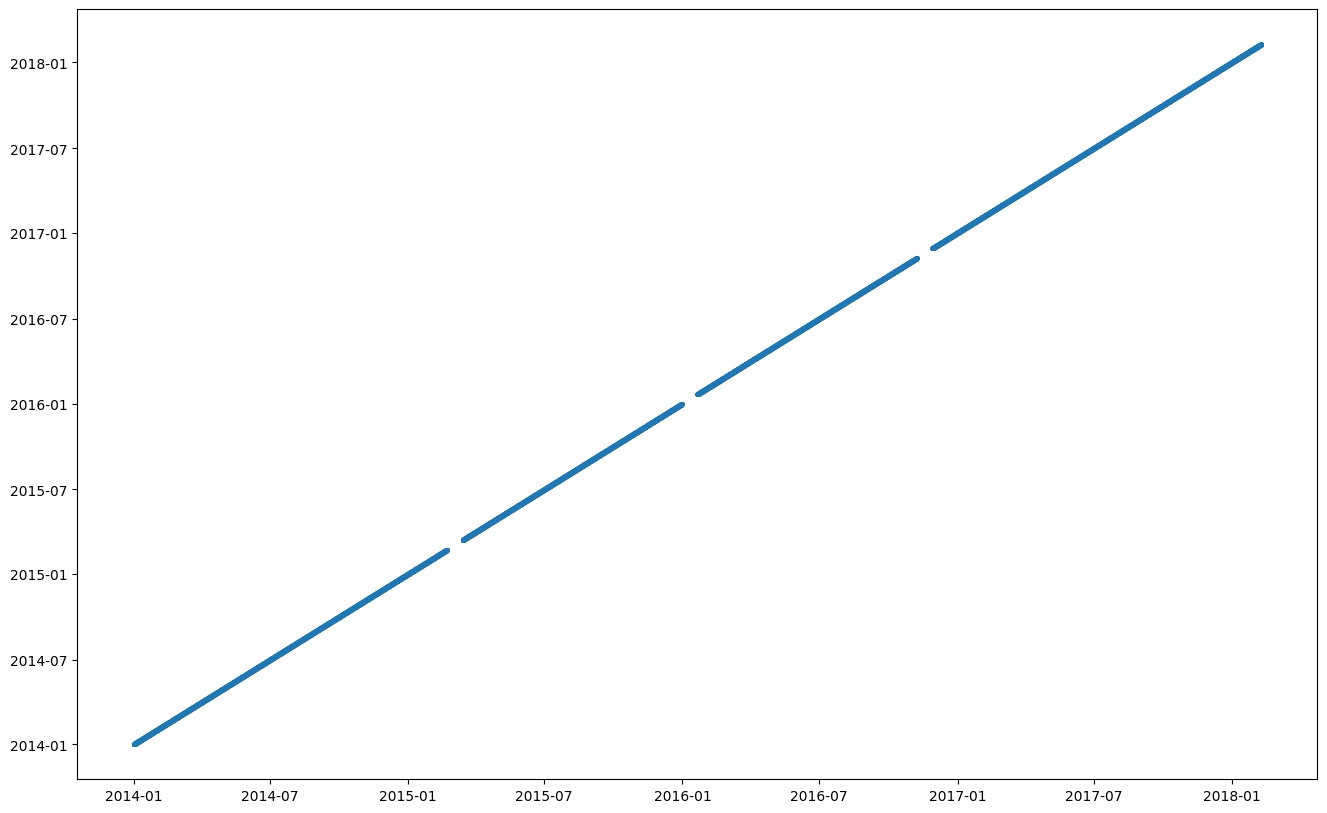

In [ ]:
#Podemos notar que hay vaciós en la data, es específico 3!
fig,ax=plt.subplots(figsize=(16,10))
ax.scatter(df_t.index,df_t.index,s=5)
plt.show()

In [ ]:
#Ahora cubrimos todo el espacio
ti=df_t.index.min()
tf=df_t.index.max()
time_total=pd.date_range(start=ti,end=tf,freq="30min")
df_t=df_t.reindex(time_total) #Esta función redefine el índice, conservando datos y agregando nans si el nuevo índice coincide con el anterior o si no existe (para cada fila!)
display(df_t)

## Almacenamos como pickle los dataframes

In [20]:
#El primer dataframe
with open('df.pkl',"wb") as file:
    pickle.dump(df,file)

#El dataframe de serie de tiempo
with open('df_t.pkl',"wb") as file:
    pickle.dump(df_t,file)

# See data and basic statistics

## Indexar

Primero entender que *pandas* tiene dos grandes tipos de objetos: `Series`y `DataFrame`. El primero es como un "vector" (unidimensional) y el segundo está compuesto por varias `Series`, siendo como una "matriz". Y cada uno siempre tiene asociado su `Index`, que puede ser numérico o de cualquier naturaleza (uno común, temporal).

La forma básica de indexar cada tipo tiene distintos resultados:
- **Series[label]** &rarr; Dará un valor escalar en tal posición acorde al `Index`.
- **DataFrame[colname]** &rarr; Dará una *Serie* correspondiente a tal nombre de columna

In [ ]:
#Accedo a una columna, me entrega a una serie, y despues a un elemento en específico
print("**Dataframe**")
print("Edad",df["age"],"\n",sep="\n")
print("Tercer valor:",df["age"][2],"\n")

#Si el índice no es numérico, esto igual se puede hacer, pero se recomienda indexar acorde al índice
print("**Dataframe temporal**")
print("Calor sensible",df_t["H"],"\n",sep="\n") #Notar que el índice es temporal
print("Tercer valor indexando con 'int':",df_t["H"][2]) #Obtengo el tercer valor -> Notar advertencia de pandas!
print("Tercer valor indexando con un 'label' del 'index':",df_t["H"]["2014-01-01 01:30:00"]) #Lo mismo pero con el tiempo, engorroso pero preciso

Siempre podemos acceder a **varios valores** de una *serie* (con indexación típica de python) o **varias columnas** en un *dataframe* (agregando un nuevo []:). Notar que esto último entrega un nuevo `DataFrame` que no permite indexación "típica" de python.

In [ ]:
display(df[["age","education"]])
#display(df[["age","education"]][1:5]) #Esto tira error
print("Del segundo al quinto valor de una columna:",df["age"][1:5],sep="\n")

También usando slices de enteros en una *serie* o *dataframe* (en este caso se accesarán filas, no columnas)

In [ ]:
#Indexado clásico de python sobre una serie
print("Del primer al quinto dato:",df["age"][:5],"\n",sep="\n") 
print("Los datos pares:",df["age"][::2],"\n",sep="\n")

#Indexado clásico de python sobre un dataframe
print("\nDel primer al quinto dato:")
display(df_t[:5]) 
print("\nLos datos dados vuelta:")
display(df_t[::-1])

Para indexar también se tienen los métodos `.loc` y `.iloc`(para *series* y *dataframes*)
1. `.loc` &rarr; trabaja con labels del índice o con arreglos booleanos.
2. `.iloc` &rarr; trabaja con posisiones con enteros (desde 0 a -1) o con arreglos booleanos.

In [ ]:
df_temp=df.drop([1]) #Boto la segunda fila
display(df_temp)

print("Con loc",df_temp.loc[2],"\n",sep="\n") #Aquí 2 es interpretado como "label", será la segunda fila

print("Con loc",df_temp.iloc[2],"\n",sep="\n") #Aquí como entero, será la tercera fila

In [ ]:
#Usando listas de elementos
print("Usando listas:")

display(df_temp.loc[[0,3,5]]) #El label 0, 3, 5

display(df_temp.iloc[[0,3,5]]) #Las posiciones asociados (otro label)

#También usando "slices"
print("\nUsando slices ahora:")

display(df_temp.loc[0:5])

display(df_temp.iloc[0:5])

print("En este caso funcionan igual por la naturaleza de este índice. NOTAR que se incluye el PRINCIPIO Y EL FINAL!")

In [ ]:
#Mezclando filas y columnas loc
print("Slice y columna - loc",df_temp.loc[2:9,"age"],"\n",sep="\n")

print("Slice y slice - loc")
display(df_temp.loc[2:9,"age":"sex"])

print("\nFilas y columnas - loc")
display(df_temp.loc[[3,5,7],["age","country","race"]])

In [ ]:
#Mezclando filas y columnas iloc

print("Slice y columna - iloc",df_temp.iloc[2:9,0],"\n",sep="\n")

print("Slice y slice - iloc")
display(df_temp.iloc[2:9,0:7])

print("\nFilas y columnas - iloc")
display(df_temp.iloc[[3,5,7],[0,5,7]])

Hay una serie de funciones que nos permiten visualizar la data. Dentro de las más básicas:
- **df.head(n)** &rarr; nos permite ver las primeras "n" filas (sin n, por default 5), funciona para `Series` y `DataFrame`.
- **df.tail(n)** &rarr; nos permite ver las últimas "n" filas (lo mismo), funciona para `Series` y `DataFrame`.

In [ ]:
#Para dataframes
display(df.head())
display(df.head(10))

#Para una serie
print(df["age"].head())

In [ ]:
display(df.tail())

display(df["workclass"].tail())